<a href="https://colab.research.google.com/github/Swathi568/Swathi_INFO5731_2025/blob/main/Group_6_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WEEK_1: LOADING AND INSPECTING THE DATASETS**

**1.1 LOADING THE DATA** -- NIKHILA & SWATHI

Checking:
✅ Number of rows and columns
✅ Column names and data types

In [ ]:
import pandas as pd
from google.colab import files


# Load the datasets (use the exact filenames after upload)
cnn_data = pd.read_excel("/content/cnn_1000.xlsx")
pubmed_data = pd.read_excel("/content/pubmed_1000.xlsx")

# Display basic info
print("CNN_DATA_BASIC_INFO" , cnn_data.info())
print("PUBMED_DATA_BASIC_INFO" , pubmed_data.info())

# Display first few rows
print("CNN_DATA_FIRST_FEW_ROWS" , cnn_data.head())
print("PUBMED_DATA_FIRST_FEW_ROWS" , pubmed_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1000 non-null   int64 
 1   url_hash      1000 non-null   object
 2   original_doc  999 non-null    object
 3   ref_sum       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
CNN_DATA_BASIC_INFO None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1000 non-null   int64 
 1   original_doc   1000 non-null   object
 2   ref_sum        1000 non-null   object
 3   section_names  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB
PUBMED_DATA_BASIC_INFO None
CNN_DATA_FIRST_FEW_ROWS    Unnamed: 0                                  url_hash  \
0           0  148960d4ed34939c6fcca34df32

**1.2 UNDERSTANDING THE DATA STRUCTURE**

Identifying key columns in each dataset

Checking for missing values

In [ ]:
print("CNN_DATA_COLUMNS")
print(cnn_data.isnull().sum())
print("PUBMED_DATA_COLUMNS")
print(pubmed_data.isnull().sum())


CNN_DATA_COLUMNS
Unnamed: 0      0
url_hash        0
original_doc    1
ref_sum         0
dtype: int64
PUBMED_DATA_COLUMNS
Unnamed: 0       0
original_doc     0
ref_sum          0
section_names    0
dtype: int64


**CLEANING THE DATASETS** -- HAYAT

**2.1 REMOVING DUPLICATES**

Checking and removing duplicate entries

In [ ]:
print("CNN_DATA_DUPLICATES" , cnn_data.duplicated().sum())
print("PUBMED_DATA_DUPLICATES" , pubmed_data.duplicated().sum())

CNN_DATA_DUPLICATES 0
PUBMED_DATA_DUPLICATES 0


In [ ]:
cnn_data = cnn_data.drop_duplicates()
pubmed_data = pubmed_data.drop_duplicates()

cnn_data.drop_duplicates(subset=['original_doc', 'ref_sum'], inplace=True)
pubmed_data.drop_duplicates(subset=['original_doc', 'ref_sum'], inplace=True)

print("CNN_DATA_Before:", cnn_data.shape)
cnn_data.drop_duplicates(inplace=True)
print("CNN_DATA_After:", cnn_data.shape)

print("PUBMED_DATA_Before:", pubmed_data.shape)
pubmed_data.drop_duplicates(inplace=True)
print("PUBMED_DATA_After:", pubmed_data.shape)


CNN_DATA_Before: (1000, 4)
CNN_DATA_After: (1000, 4)
PUBMED_DATA_Before: (1000, 4)
PUBMED_DATA_After: (1000, 4)


**2.2 HANDLING MISSING VALUES**

If any key columns have missing values, removing those rows

In [ ]:
print("CNN_DATA_Before:", cnn_data.shape)
cnn_data.dropna(subset=['original_doc'], inplace=True)
print("CNN_DATA_After:", cnn_data.shape)

print("PUBMED_DATA_Before:", pubmed_data.shape)
pubmed_data.dropna(subset=['original_doc'], inplace=True)
print("PUBMED_DATA_After:", pubmed_data.shape)


CNN_DATA_Before: (1000, 4)
CNN_DATA_After: (999, 4)
PUBMED_DATA_Before: (1000, 4)
PUBMED_DATA_After: (1000, 4)


**2.3 NORMALIZING TEXT**

Converting all text to lowercase to maintain consistency.

Removing extra spaces, special characters, and unnecessary symbols

In [ ]:
import re

# Check column names to ensure 'original_doc' and 'ref_sum' exist
print("CNN_DATA_COLUMNS")
print(cnn_data.columns)  # Check columns in cnn_data
print("PUBMED_DATA_COLUMNS")
print(pubmed_data.columns)  # Check columns in pubmed_data

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    return text.strip()

# Apply the clean_text function to the correct columns
cnn_data['original_doc_cleaned'] = cnn_data['original_doc'].apply(clean_text)
cnn_data['ref_sum_cleaned'] = cnn_data['ref_sum'].apply(clean_text)

pubmed_data['original_doc_cleaned'] = pubmed_data['original_doc'].apply(clean_text)
pubmed_data['ref_sum_cleaned'] = pubmed_data['ref_sum'].apply(clean_text)


CNN_DATA_COLUMNS
Index(['Unnamed: 0', 'url_hash', 'original_doc', 'ref_sum'], dtype='object')
PUBMED_DATA_COLUMNS
Index(['Unnamed: 0', 'original_doc', 'ref_sum', 'section_names'], dtype='object')


**REMOVING UNNAMED COLUMNS**

In [ ]:
cnn_data = cnn_data.drop(columns=['Unnamed: 0'])
pubmed_data = pubmed_data.drop(columns=['Unnamed: 0'])
print("CNN_DATA_COLUMNS")
print(cnn_data.columns)  # Check columns in cnn_data
print("PUBMED_DATA_COLUMNS")
print(pubmed_data.columns)  # Check columns in pubmed_data

CNN_DATA_COLUMNS
Index(['url_hash', 'original_doc', 'ref_sum', 'original_doc_cleaned',
       'ref_sum_cleaned'],
      dtype='object')
PUBMED_DATA_COLUMNS
Index(['original_doc', 'ref_sum', 'section_names', 'original_doc_cleaned',
       'ref_sum_cleaned'],
      dtype='object')


**EXPLORING AND SUMMARIZING DATA** -- NIKHILA & SWATHI

**3.1 CHECKING WORD & SENTENCE COUNTS**

Finging the average length of articles(word count) to get an idea of the dataset size

This will be helpful to determine whether articles need summarization before generating QA pairs further.

In [ ]:
# Calculate word count for 'original_doc_cleaned' and 'ref_sum_cleaned'
cnn_data['original_doc_word_count'] = cnn_data['original_doc_cleaned'].apply(lambda x: len(x.split()))
cnn_data['ref_sum_word_count'] = cnn_data['ref_sum_cleaned'].apply(lambda x: len(x.split()))

pubmed_data['original_doc_word_count'] = pubmed_data['original_doc_cleaned'].apply(lambda x: len(x.split()))
pubmed_data['ref_sum_word_count'] = pubmed_data['ref_sum_cleaned'].apply(lambda x: len(x.split()))

# Display the word count statistics
print("CNN_DATA_Word_Count_Statistics:")
print(cnn_data[['original_doc_word_count', 'ref_sum_word_count']].describe())
print("\nPUBMED_DATA_Word_Count_Statistics:")
print(pubmed_data[['original_doc_word_count', 'ref_sum_word_count']].describe())


CNN_DATA_Word_Count_Statistics:
       original_doc_word_count  ref_sum_word_count
count               999.000000          999.000000
mean                670.366366           49.394394
std                 347.477956           10.511021
min                  65.000000           13.000000
25%                 393.000000           42.000000
50%                 626.000000           50.000000
75%                 889.000000           57.000000
max                1797.000000           78.000000

PUBMED_DATA_Word_Count_Statistics:
       original_doc_word_count  ref_sum_word_count
count              1000.000000         1000.000000
mean               2378.021000          176.267000
std                1309.418518           65.801775
min                 109.000000           29.000000
25%                1291.250000          130.000000
50%                2165.000000          183.000000
75%                3221.000000          223.000000
max                5280.000000          331.000000


**3.2 VISUALIZING DATA DISTRIBUTION**

Creating a histogram to see how article lengths are distributed.

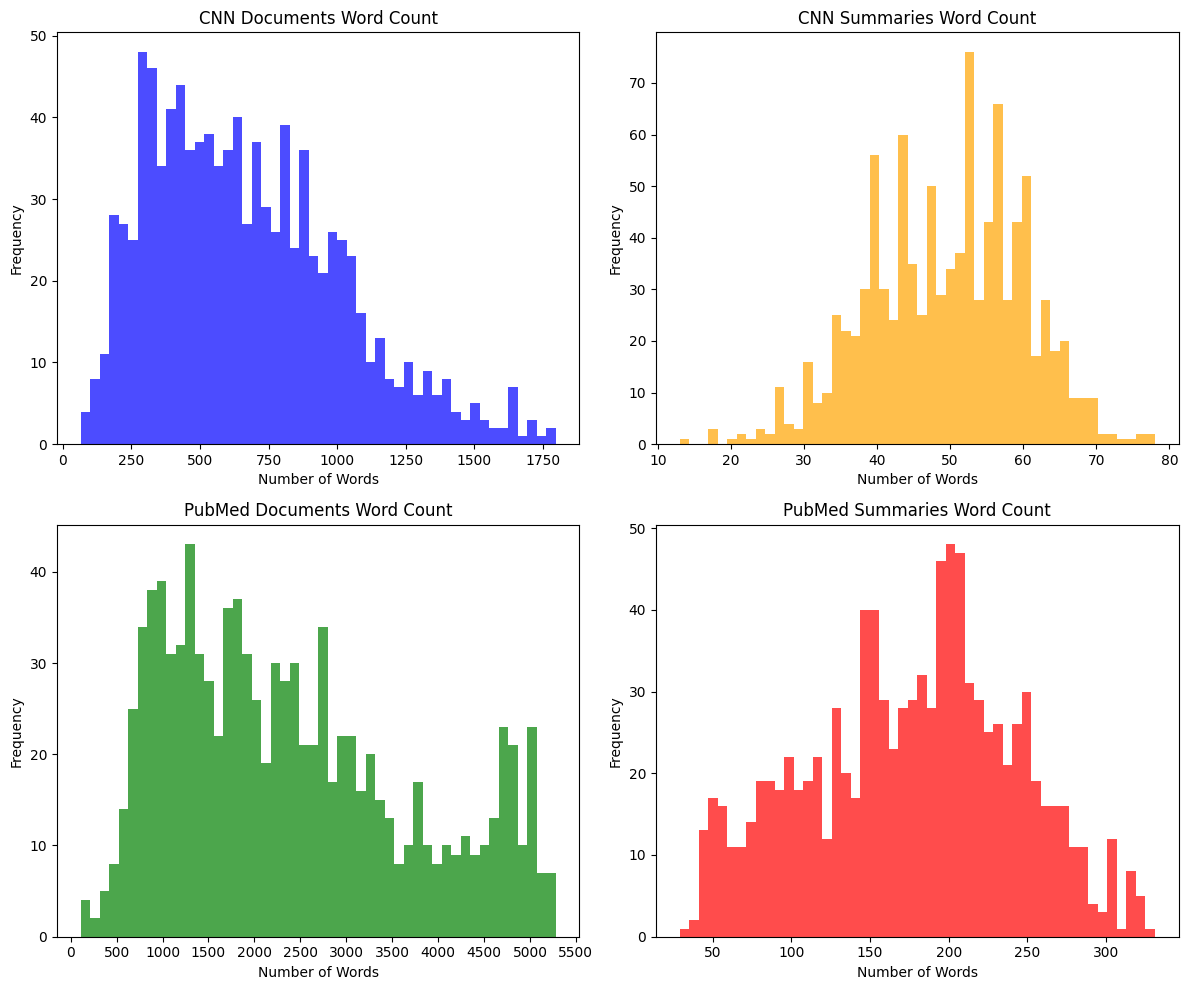

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create 2x2 subplot grid for separate graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Determine x-axis tick intervals (500 steps)
x_ticks = np.arange(0, max(
    cnn_data['original_doc_word_count'].max(),
    cnn_data['ref_sum_word_count'].max(),
    pubmed_data['original_doc_word_count'].max(),
    pubmed_data['ref_sum_word_count'].max()
) + 500, 500)  # Adjusting max range dynamically

# CNN Documents
axes[0, 0].hist(cnn_data['original_doc_word_count'], bins=50, color='blue', alpha=0.7)
axes[0, 0].set_title("CNN Documents Word Count")
axes[0, 0].set_xlabel("Number of Words")
axes[0, 0].set_ylabel("Frequency")

# CNN Summaries
axes[0, 1].hist(cnn_data['ref_sum_word_count'], bins=50, color='orange', alpha=0.7)
axes[0, 1].set_title("CNN Summaries Word Count")
axes[0, 1].set_xlabel("Number of Words")
axes[0, 1].set_ylabel("Frequency")

# PubMed Documents
axes[1, 0].hist(pubmed_data['original_doc_word_count'], bins=50, color='green', alpha=0.7)
axes[1, 0].set_title("PubMed Documents Word Count")
axes[1, 0].set_xlabel("Number of Words")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_xticks(x_ticks)



# PubMed Summaries
axes[1, 1].hist(pubmed_data['ref_sum_word_count'], bins=50, color='red', alpha=0.7)
axes[1, 1].set_title("PubMed Summaries Word Count")
axes[1, 1].set_xlabel("Number of Words")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


**SAVING PROCESSED DATA** -- HAYAT

After cleaning, saving the preprocessed datasets for the next phase of this project, will be using these for generating QA pairs.

In [ ]:
import os

# Ensure the 'results' directory exists
os.makedirs("/content/", exist_ok=True)

# Save cleaned datasets with word counts to CSV
cnn_data.to_csv("/content/CNN_cleaned.csv", index=False)
pubmed_data.to_csv("/content/PubMed_cleaned.csv", index=False)

print("✅ Cleaned datasets saved successfully in '/content/results/' folder!")

!ls -lh /content/results


✅ Cleaned datasets saved successfully in '/content/results/' folder!
total 41M
-rw-r--r-- 1 root root 8.3M Feb 27 00:11 CNN_cleaned.csv
-rw-r--r-- 1 root root  33M Feb 27 00:11 PubMed_cleaned.csv


In [ ]:
from transformers import pipeline, AutoTokenizer
import pandas as pd
import torch
import os
from huggingface_hub import login
from getpass import getpass

# Load dataset
print("Loading dataset...")
cnn_file_path = "/content/cnn_1000_less.xlsx"
cnn_df = pd.read_excel(cnn_file_path)

# Ensure the 'original_doc' column exists
if "original_doc" not in cnn_df.columns:
    raise KeyError("'original_doc' column not found in the dataset.")

# Authenticate Hugging Face API
huggingface_token = getpass("Enter your Hugging Face Token: ")
os.environ["HUGGINGFACE_TOKEN"] = huggingface_token

print("Authenticating Hugging Face API...")
login(huggingface_token)
print("Authentication successful!")

Loading dataset...
Enter your Hugging Face Token: ··········
Authenticating Hugging Face API...
Authentication successful!


In [ ]:
#  Load model
model_name = "google/flan-t5-large"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Loading model {model_name} on {device}...")

qa_pipeline = pipeline(
    "text2text-generation",
    model=model_name,
    tokenizer=model_name,
    device=0 if torch.cuda.is_available() else -1
)
print("Model loaded successfully!")

#  Load tokenizer
print("Loading tokenizer...")
tokenizer = AutoTokenizer.from_pretrained(model_name)
print("Tokenizer loaded")

Loading model google/flan-t5-large on cpu...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


Model loaded successfully!
Loading tokenizer...
Tokenizer loaded


In [ ]:

#  Improved Prompt for Unique Question Generation
prompt_template = """
You are an AI designed to generate **10** **unique**, **meaningful**, and **diverse** questions based on a given document. Your task is to create exactly **10** different and meaningful questions that cover the following formats:
- **Who, What, When**: Questions about people, events, or timelines.
- **Why, How**: Questions about reasons, processes, or methods.
- **Yes/No**: Questions that can be answered with a yes or no.
- **Multiple-choice style**: Questions with multiple possible answers.
- **Open-ended analysis**: Questions that require detailed explanations or opinions.

Ensure each question is:
- **Distinct**: Avoid repetition or similar phrasing.
- **Meaningful**: Directly related to the document and its content.
- **Diverse**: Cover a wide range of topics and formats.

### DOCUMENT:
{document_text}

### QUESTIONS:
1.
2.
3.
4.
5.
6.
7.
8.
9.
10.
"""

# Function to Generate Unique Questions
def generate_questions(doc):
    if pd.isna(doc) or not isinstance(doc, str):  # Handle missing or non-string values
        return "No questions generated (empty or invalid document)."

    # Truncate input text to fit within model limits
    inputs = tokenizer(doc, truncation=True, max_length=3000, return_tensors="pt")
    truncated_doc = tokenizer.batch_decode(inputs["input_ids"], skip_special_tokens=True)[0]

    prompt = prompt_template.format(document_text=truncated_doc)

    print("\n Processing document...")
    print(" Original text preview:", doc[:300], "...")  # Show a preview for debugging
    print(" Truncated document preview:", truncated_doc[:300], "...")

    #  Generate response
    try:
        response = qa_pipeline(
            prompt,
            max_new_tokens= 720,  # Adjusted token limit for better question generation
            temperature= 0.9,  # Increased temperature for more diversity
            do_sample=True,
            top_k=50,  # Use top-k sampling
            top_p=0.95  # Use top-p sampling
        )

        generated_text = response[0]["generated_text"]
        print("\n Raw Generated Output:\n", generated_text)  # Debugging print

        #  Extract questions

        questions = []
        for line in generated_text.split("\n"):
            line = line.strip()
            if line and line[0].isdigit() and line[1] == '.':  # Ensures numbered format
                question = line[3:].strip()  # Remove numbering and extra spaces
                if question:  # Ensure the question is not empty
                    questions.append(question + '/n')

        # Filter out repetitive or generic questions
        def filter_questions(questions):
            filtered_questions = []
            seen = set()
            for question in questions:
                # Skip if the question is too short or generic
                if len(question.split()) < 5 or question.lower() in seen:
                    continue
                seen.add(question.lower())
                filtered_questions.append(question + '/n')
            return filtered_questions

        filtered_questions = filter_questions(questions)

        # Format questions as a numbered list
        def format_questions(questions):
            formatted_questions = []
            for i, question in enumerate(questions, start=1):
                formatted_questions.append(f"{i}. {question}")
            return "\n".join(formatted_questions)

        formatted_questions = format_questions(filtered_questions)

        # Return questions even if fewer than 10 are generated
        if formatted_questions:
            return formatted_questions
        else:
            return "No questions generated."
    except Exception as e:
        print(f" Error generating questions: {e}")
        return "Error generating questions."

#  Process dataset
sample_size = min(10, len(cnn_df))  # Process first 10 rows for testing
cnn_df_sample = cnn_df.head(sample_size).copy()  # Explicitly create a copy to avoid SettingWithCopyWarning
print(f"\n Generating questions for {sample_size} documents...\n")

# Apply function to dataset
cnn_df_sample.loc[:, "questions"] = cnn_df_sample["original_doc"].astype(str).apply(generate_questions)

#  Show preview before saving
print("\n Final Questions Stored in DataFrame:\n", cnn_df_sample[["original_doc", "questions"]].head())

#  Save results to CSV
cnn_output_path = "/content/cnn_questions_generated.csv"
cnn_df_sample.to_csv(cnn_output_path, index=False)
print(f" Question generation completed. File saved at: {cnn_output_path}")


Token indices sequence length is longer than the specified maximum sequence length for this model (1481 > 512). Running this sequence through the model will result in indexing errors



 Generating questions for 2 documents...


 Processing document...
 Original text preview: silver spring , maryland -lrb- cnn -rrb- -- as marilyn seitz helps customers find just the right size , she wonders how much longer before she 's forced to close her doors . maryland thrift store manager marilyn seitz says the new rules have the potential to put the store out of business . the penny ...
 Truncated document preview: silver spring , maryland -lrb- cnn -rrb- -- as marilyn seitz helps customers find just the right size , she wonders how much longer before she 's forced to close her doors . maryland thrift store manager marilyn seitz says the new rules have the potential to put the store out of business . the penny ...

 Raw Generated Output:
 1. What is the pennyworth thrift store? 2. What is it about? 3. Why is this article so important ? 4. What is the age of children in the article ? 5. What does the article cover ? 6. What about the toy ban ? 7. What does the article mention abo

In [ ]:
#  Improved Function to Generate Detailed Answers
def generate_answers(question, doc):
    if pd.isna(question) or not isinstance(question, str):  # Handle missing or non-string values
        return "No answer generated (empty or invalid question)."

    #  Truncate input text to fit within model limits
    inputs = tokenizer(doc, truncation=True, max_length= 3000, return_tensors="pt")  # Increased max_length
    truncated_doc = tokenizer.batch_decode(inputs["input_ids"], skip_special_tokens=True)[0]

    # Refined prompt for better guidance
    prompt = f"""
    Answer the following question in detail based on the document. Provide a comprehensive response that includes all relevant information. If the answer is not explicitly mentioned in the document, respond with "Answer not found in the document."

    Question: {question}

    Document: {truncated_doc}

    Answer:
    """
    print("\n Processing question:", question)  # Show the question preview for debugging

    #  Generate response
    try:
        response = qa_pipeline(
            prompt,
            max_new_tokens= 500,  # Increased token limit for longer answers
            temperature=0.7,  # Increased temperature for more diverse answers
            do_sample=True,  # Enable sampling
            top_p=0.95,  # Use nucleus sampling
            top_k=50,  # Limit sampling pool to top-k tokens
        )

        generated_answer = response[0]["generated_text"].strip()
        print(" Raw Generated Answer:", generated_answer)  # Debugging: Print the raw answer

        # Improved answer validation
        if (
            "unknown" in generated_answer.lower()
            or len(generated_answer.split()) < 5  # Increased minimum word count
            or "not found" in generated_answer.lower()
        ):
            return "Answer not found in the document."

        # Return the answer
        return generated_answer
    except Exception as e:
        print(f" Error generating answer: {e}")
        return "Error generating answer."

#  Load the CSV file with generated questions
cnn_df_sample = pd.read_csv("/content/cnn_questions_generated.csv")  # Ensure this is where your generated questions CSV is located
print("\n Loaded CSV file with generated questions.")

#  Apply the answer generation function to the DataFrame
def generate_answers_for_row(row):
    questions = row["questions"].split('\n')  # Split questions into a list
    Adoc = []
    for i, question in enumerate(questions, start=1):
        if question.strip():  # Ensure the question is not empty
            answer = generate_answers(question, row["original_doc"])
            Adoc.append(f"{i}A. {answer}")
        else:
            Adoc.append(f"{i}A. No question provided.")
    return "\n".join(Adoc)

# Apply the function to generate answers for each row
cnn_df_sample["Adoc"] = cnn_df_sample.apply(generate_answers_for_row, axis=1)

#  Show preview before saving
print("\n Final Questions and Answers Stored in DataFrame:\n", cnn_df_sample[["original_doc", "questions", "Adoc"]].head())

#  Save the updated DataFrame with answers to a new CSV file
cnn_output_with_answers_path = "/content/cnn_questions_with_answers.csv"
cnn_df_sample.to_csv(cnn_output_with_answers_path, index=False)
print(f" Answer generation completed. File saved at: {cnn_output_with_answers_path}")


 Loaded CSV file with generated questions.

 Processing question: 1. What is the pennyworth thrift store? 2. What is it about? 3. Why is this article so important ? 4. What is the age of children in the article ? 5. What does the article cover ? 6. What about the toy ban ? 7. What does the article mention about the new rules ? 8. What is the author 's opinion on the new rules ? 9. What is the author 's concern about the new rules ? 10. What does the author agree ?/n/n
 Raw Generated Answer: 1. pennyworth thrift store 2. secondhand stores 3. people are trying to save money 4. children younger than 12 5. secondhand stores 6. new federal restrictions on lead and other harmful substances 7. stores could face fines of up to $ 100,000 per violation 8. seitz is worried her business may become an unintended casualty of an attempt to protect children 9. the pennworth thrift store in silver spring , maryland isn't suffering from the struggling economy 10. the pennworth thrift store in silver sp

In [ ]:
#  Improved Function to Generate Detailed Answers
def generate_answers(question, doc):
    if pd.isna(question) or not isinstance(question, str):  # Handle missing or non-string values
        return "No answer generated (empty or invalid question)."

    #  Truncate input text to fit within model limits
    inputs = tokenizer(doc, truncation=True, max_length= 3000, return_tensors="pt")  # Increased max_length
    truncated_doc = tokenizer.batch_decode(inputs["input_ids"], skip_special_tokens=True)[0]

    # Refined prompt for better guidance
    prompt = f"""
    Answer the following question in detail based on the document. Provide a comprehensive response that includes all relevant information. If the answer is not explicitly mentioned in the document, respond with "Answer not found in the document."

    Question: {question}

    Document: {truncated_doc}

    Answer:
    """
    print("\n Processing question:", question)  # Show the question preview for debugging

    #  Generate response
    try:
        response = qa_pipeline(
            prompt,
            max_new_tokens= 500,  # Increased token limit for longer answers
            temperature=0.7,  # Increased temperature for more diverse answers
            do_sample=True,  # Enable sampling
            top_p=0.95,  # Use nucleus sampling
            top_k=50,  # Limit sampling pool to top-k tokens
        )

        generated_answer = response[0]["generated_text"].strip()
        print(" Raw Generated Answer:", generated_answer)  # Debugging: Print the raw answer

        # Improved answer validation
        if (
            "unknown" in generated_answer.lower()
            or len(generated_answer.split()) < 5  # Increased minimum word count
            or "not found" in generated_answer.lower()
        ):
            return "Answer not found in the document."

        # Return the answer
        return generated_answer
    except Exception as e:
        print(f" Error generating answer: {e}")
        return "Error generating answer."

#  Load the CSV file with generated questions
cnn_df_sample = pd.read_csv("/content/cnn_questions_with_answers.csv")  # Ensure this is where your generated questions CSV is located
print("\n Loaded CSV file with generated questions and answers.")

#  Apply the answer generation function to the DataFrame
def generate_answer_for_row(row):
    questions = row["questions"].split('\n')  # Split questions into a list
    Asum = []
    for i, question in enumerate(questions, start=1):
        if question.strip():  # Ensure the question is not empty
            answer1 = generate_answers(question, row["ref_sum"])
            Asum.append(f"{i}A. {answer1}")
        else:
            Asum.append(f"{i}A. No question provided.")
    return "\n".join(Asum)

# Apply the function to generate answers for each row
cnn_df_sample["Asum"] = cnn_df_sample.apply(generate_answer_for_row, axis=1)

#  Show preview before saving
print("\n Final Questions and Answers Stored in DataFrame:\n", cnn_df_sample[["ref_sum", "questions", "Asum"]].head())

#  Save the updated DataFrame with answers to a new CSV file
cnn_output_with_answers1_path = "/content/cnn_questions_with_answers1.csv"
cnn_df_sample.to_csv(cnn_output_with_answers1_path, index=False)
print(f" Answer generation completed. File saved at: {cnn_output_with_answers1_path}")


 Loaded CSV file with generated questions and answers.

 Processing question: 1. What is the pennyworth thrift store? 2. What is it about? 3. Why is this article so important ? 4. What is the age of children in the article ? 5. What does the article cover ? 6. What about the toy ban ? 7. What does the article mention about the new rules ? 8. What is the author 's opinion on the new rules ? 9. What is the author 's concern about the new rules ? 10. What does the author agree ?/n/n
 Raw Generated Answer: 1. pennyworth thrift store 2. children 3. toy ban 4. kids ' clothes 5. children 's books and toys 6. no 7. they are trying to help stores understand what is safe 8. the author is not sure 9. he is concerned that the new rules will force them to toss kids ' inventory 10. he is not sure

 Processing question: 1. Who is president viktor yanukovych? 2. Who is his rival in the presidential race? 3. Who has his supporters criticized for their anti-government actions? 4. Which party has yanuko

In [ ]:
pip install nltk rouge-score bert-score sacrebleu


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 822.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
import rouge_score
from rouge_score import rouge_scorer
from nltk.tokenize import word_tokenize
import sacrebleu
from bert_score import score


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def exact_match(reference, candidate):
    return 1.0 if reference.strip().lower() == candidate.strip().lower() else 0.0
def partial_match(reference, candidate):
    ref_tokens = set(word_tokenize(reference.lower()))
    cand_tokens = set(word_tokenize(candidate.lower()))
    return len(ref_tokens & cand_tokens) / max(1, len(ref_tokens))


In [ ]:
def compute_bleu(reference, candidate):
    return sacrebleu.sentence_bleu(candidate, [reference]).score
def compute_rouge(reference, candidate):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, candidate)
    return scores
def compute_bertscore(reference, candidate):
    P, R, F1 = score([candidate], [reference], lang="en")
    return F1.item()  # Return F1 score



In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import sacrebleu
from bert_score import score
from transformers import pipeline
from rouge_score import rouge_scorer  # Correct import
nltk.download('punkt')

# Function for Exact Match
def exact_match(reference, candidate):
    return 1.0 if reference.strip().lower() == candidate.strip().lower() else 0.0

# Function for Partial Match (Jaccard Similarity)
def jaccard_similarity(reference, candidate):
    ref_tokens = set(word_tokenize(reference.lower()))
    cand_tokens = set(word_tokenize(candidate.lower()))
    return len(ref_tokens & cand_tokens) / max(1, len(ref_tokens))

# BLEU Score
def compute_bleu(reference, candidate):
    return sacrebleu.sentence_bleu([candidate.split()], [reference.split()]).score

# ROUGE Score
def compute_rouge(reference, candidate):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, candidate)
    return scores['rouge-l'].f1  # F1 score for ROUGE-L

# BERTScore
def compute_bertscore(reference, candidate):
    P, R, F1 = score([candidate], [reference], lang="en")
    return F1.item()

# LLM-based method (GPT-3.5/4-based comparison)
qa_evaluator = pipeline("text-classification", model="facebook/bart-large-mnli")
def llm_evaluate(a, b):
    prompt = f"Are these answers equivalent? Answer 1: {a} Answer 2: {b}"
    result = qa_evaluator(prompt)
    return result[0]['score']

# Load data
df = pd.read_csv("cnn_questions_with_answers1.csv")

# Iterate through each row and evaluate the answers
results = []
for i, row in df.iterrows():
    # Assuming each row has a set of answers (Adoc and Asum columns)
    Adoc_answer = str(row['Adoc'])
    Asum_answer = str(row['Asum'])

    # Collecting scores for each pair of answers
    scores = {
        "exact_match": exact_match(Adoc_answer, Asum_answer),
        "partial_match": jaccard_similarity(Adoc_answer, Asum_answer),
        "bleu": compute_bleu(Adoc_answer, Asum_answer),
        "rouge": compute_rouge(Adoc_answer, Asum_answer),
        "bertscore": compute_bertscore(Adoc_answer, Asum_answer),
        "llm_based": llm_evaluate(Adoc_answer, Asum_answer)
    }
    results.append(scores)

# Convert to DataFrame for easier insp


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]